In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
data = np.loadtxt("df_tempChange.csv", delimiter=',', dtype='unicode')
data1 = np.loadtxt("df_soilNutrientBudget.csv", delimiter=',', dtype='unicode')
data2 = np.loadtxt("df_fertIndic.csv", delimiter=',', dtype='unicode')
data3 = np.loadtxt("df_pestIndic.csv", delimiter=',', dtype='unicode')
data4 = np.loadtxt("df_pestUse.csv", delimiter=',', dtype='unicode')
data5 = np.loadtxt("df_productionIndic.csv", delimiter=',', dtype='unicode')
data6 = np.loadtxt("df_cropProduct_yield.csv", delimiter=',', dtype='unicode')
data7 = np.loadtxt("df_cropProduct_area.csv", delimiter=',', dtype='unicode')
data_list = [data, data1, data2, data3, data4, data5, data6, data7]

# Data preprocessing

In [3]:
# dfs = [df_tempChange, df_soilNutrientBudget, df_fertIndic, df_pestIndic, df_pestUse, df_productionIndic, df_cropProduct_yield, df_cropProduct_area]
dfs = [0] * len(data_list)
areas = []

ecl = [['Months', 'Months Code', 'Area Code (FAO)'],
      ['Element','Item Code', 'Area Code (FAO)'],
      ['Element','Item Code', 'Area Code (FAO)'],
      ['Element','Item Code', 'Area Code (M49)'],
      ['Element','Item Code', 'Area Code (M49)'],
      ['Element','Item Code (FAO)', 'Area Code (FAO)'],
      ['Year Code', 'Element', 'Area Code (FAO)', 'Item Code (FAO)'],
      ['Year Code', 'Element', 'Area Code (FAO)', 'Item Code (FAO)']]

drop_cols = ['Domain Code', 'Domain', 'Element Code', 'Flag Description', 'Unit', 'Flag', 'Year Code']
def modify_cols(df_given, extra_cols, col = 'Item'):
    df_given = df_given.drop(labels=0, axis=0)
    df_given = df_given.drop(drop_cols + extra_cols, axis='columns')
    areas.append(df_given['Area'])
    df_given = pd.pivot_table(df_given, index=['Area','Year'], columns = [col], values=['Value'],aggfunc='sum')
    return df_given

In [4]:
i=0
for dl in data_list:
    dfs[i] = pd.DataFrame(dl, columns = list(dl[0]))
    if i == 0:
        dfs[i] = modify_cols(dfs[i], ecl[i], 'Element')
    else:
        dfs[i] = modify_cols(dfs[i], ecl[i])
    i+=1

newColsForDf7=[]
for f in range(len(list(dfs[7].columns))):
    newColsForDf7.append(dfs[7].columns[f][1]+'_')
dfs[7].columns = newColsForDf7

dfs[3] = dfs[3].rename(columns={'Pesticides (total)': 'Pesticides'})
final_input = dfs[0].join(dfs[1:])
final_input = final_input.replace(r'^\s*$', np.nan, regex=True)
final_input = final_input.fillna(0)
final_input.head(20)

(Value, Temperature change) (Value, Manure applied to Soils)  \
Area        Year                                                                
Afghanistan 2000                       1.109                           7.4639   
            2001                       1.366                           6.4604   
            2002                       1.384                            6.821   
            2003                       0.615                           6.8366   
            2004                       1.427                           6.9059   
            2005                       0.491                           7.2315   
            2006                        1.78                            6.942   
            2007                       0.736                           6.7125   
            2008                       0.804                           7.8267   
            2009                       0.929                           8.1714   
            2010                       1.646                           9.3327   
            2011                       1.446                           9.5757   
            2012                       0.234                           9.4134   
            2013                       1.308                           9.2035   
            2014                       0.457                           9.3232   
            2015                       1.101                            9.032   
            2016                       1.607                           8.9987   
            2017                       1.568                           9.0064   
            2018                        1.58                           9.1084   
Albania     2000                       1.112                           58.357   

                 (Value, Synthetic Fertilizers)  \
Area        Year                                  
Afghanistan 2000                         0.6449   
            2001                         2.3733   
            2002                         3.1631   
            2003                         2.5799   
            2004                         2.8239   
            2005                         2.5874   
            2006                          2.587   
            2007                         2.0705   
            2008                         1.8245   
            2009                         1.7896   
            2010                         1.6343   
            2011                          2.904   
            2012                         2.1574   
            2013                         4.4126   
            2014                         9.3392   
            2015                         2.6644   
            2016                        12.2213   
            2017                        17.7972   
            2018                         5.8863   
Albania     2000                        17.3104   

                 (Value, Nutrient nitrogen N (total))  \
Area        Year                                        
Afghanistan 2000                                 0.64   
            2001                                 2.37   
            2002                                 3.16   
            2003                                 2.58   
            2004                                 2.82   
            2005                                 2.59   
            2006                                 2.59   
            2007                                 2.07   
            2008                                 1.82   
            2009                                 1.79   
            2010                                 1.63   
            2011                                  2.9   
            2012                                 2.16   
            2013                                 4.41   
            2014                                 9.34   
            2015                                 2.66   
            2016                                12.22   
            2017            

In [5]:
finCols = list(final_input.columns)

In [6]:
series = [0]*len(finCols)
i=0
for finCol in finCols:
    series[i] = list(final_input[finCol].astype('float'))
    i+=1

area_list = list(set([item for sublist in areas for item in sublist]))
area_list.sort()
no_of_areas = len(series[0])
area_col_data = []


for a in area_list:
    r = final_input.iloc[final_input.index.isin([a], level=0)].shape[0]
    for n in range(r):
        area_col_data.append(a)
i=0
fin_data = {'Area': area_col_data}
for finCol in finCols:
    if type(finCol) is tuple:
        finCol = finCol[1]
    fin_data[finCol] = series[i]
    i+=1

df_final = pd.DataFrame(fin_data)

# Saving final data as csv file

In [7]:
import os  

os.makedirs('finalData', exist_ok=True)  

df_final.to_csv('finalData/out.csv') 

In [8]:
# final_input.iloc[final_input.index.isin(['American Samoa'], level=0)].shape

In [9]:
df_final.head(20)

,Area,Temperature change,Manure applied to Soils,Synthetic Fertilizers,Nutrient nitrogen N (total),Nutrient phosphate P2O5 (total),Nutrient potash K2O (total),Pesticides,Insecticides,Pesticides (total),...,Tung nuts_,Vanilla_,Vegetables fresh nes_,Vegetables leguminous nes_,Vetches_,Walnuts with shell_,Watermelons_,Wheat_,Yams_,Yautia (cocoyam)_
0,Afghanistan,1.109,7.4639,0.6449,0.64,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,55501.0,0.0,0.0,2300.0,12335.0,2029000.0,0.0,0.0
1,Afghanistan,1.366,6.4604,2.3733,2.37,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,55252.0,0.0,0.0,2300.0,12456.0,1779000.0,0.0,0.0
2,Afghanistan,1.384,6.8210,3.1631,3.16,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,55835.0,0.0,0.0,2300.0,12581.0,1742000.0,0.0,0.0
3,Afghanistan,0.615,6.8366,2.5799,2.58,0.84,0.00,0.00,0.0,0.0,...,0.0,0.0,55277.0,0.0,0.0,3100.0,11200.0,2320000.0,0.0,0.0
4,Afghanistan,1.427,6.9059,2.8239,2.82,1.36,0.00,0.00,0.0,0.0,...,0.0,0.0,51660.0,0.0,0.0,2000.0,6300.0,1888000.0,0.0,0.0
5,Afghanistan,0.491,7.2315,2.5874,2.59,1.16,0.01,0.00,0.0,0.0,...,0.0,0.0,87813.0,0.0,0.0,2211.0,12326.0,2342000.0,0.0,0.0
6,Afghanistan,1.780,6.9420,2.5870,2.59,0.56,0.00,0.00,0.0,0.0,...,0.0,0.0,68400.0,0.0,0.0,2300.0,20000.0,2444000.0,0.0,0.0
7,Afghanistan,0.736,6.7125,2.0705,2.07,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,68000.0,0.0,0.0,2300.0,20000.0,2466000.0,0.0,0.0
8,Afghanistan,0.804,7.8267,1.8245,1.82,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,67999.0,0.0,0.0,2300.0,20000.0,2139000.0,0.0,0.0
9,Afghanistan,0.929,8.1714,1.7896,1.79,0.07,0.00,0.00,0.0,0.0,...,0.0,0.0,72200.0,0.0,0.0,2382.0,25100.0,2575000.0,0.0,0.0


In [124]:
#CREATING INPUT MATRIX
inputData = df_final.iloc[:,:11]
inputData.drop(['Pesticides (total)'], axis=1, inplace=True)
inputData.corr()

,Temperature change,Manure applied to Soils,Synthetic Fertilizers,Nutrient nitrogen N (total),Nutrient phosphate P2O5 (total),Nutrient potash K2O (total),Pesticides,Insecticides,Crops
Temperature change,1.000000,0.102642,0.142217,0.180671,0.060794,0.096521,0.020783,0.030056,0.087950
Manure applied to Soils,0.102642,1.000000,0.250327,0.348632,0.238639,0.294369,0.344851,0.013049,0.239920
Synthetic Fertilizers,0.142217,0.250327,1.000000,0.813622,0.657868,0.556953,0.420188,0.153765,0.289331
Nutrient nitrogen N (total),0.180671,0.348632,0.813622,1.000000,0.687887,0.616708,0.441567,0.285360,0.282220
Nutrient phosphate P2O5 (total),0.060794,0.238639,0.657868,0.687887,1.000000,0.717184,0.528337,0.366751,0.259176
Nutrient potash K2O (total),0.096521,0.294369,0.556953,0.616708,0.717184,1.000000,0.466139,0.182501,0.228336
Pesticides,0.020783,0.344851,0.420188,0.441567,0.528337,0.466139,1.000000,0.303651,0.254043
Insecticides,0.030056,0.013049,0.153765,0.285360,0.366751,0.182501,0.303651,1.000000,0.035363
Crops,0.087950,0.239920,0.289331,0.282220,0.259176,0.228336,0.254043,0.035363,1.000000


# Correlation between input columns

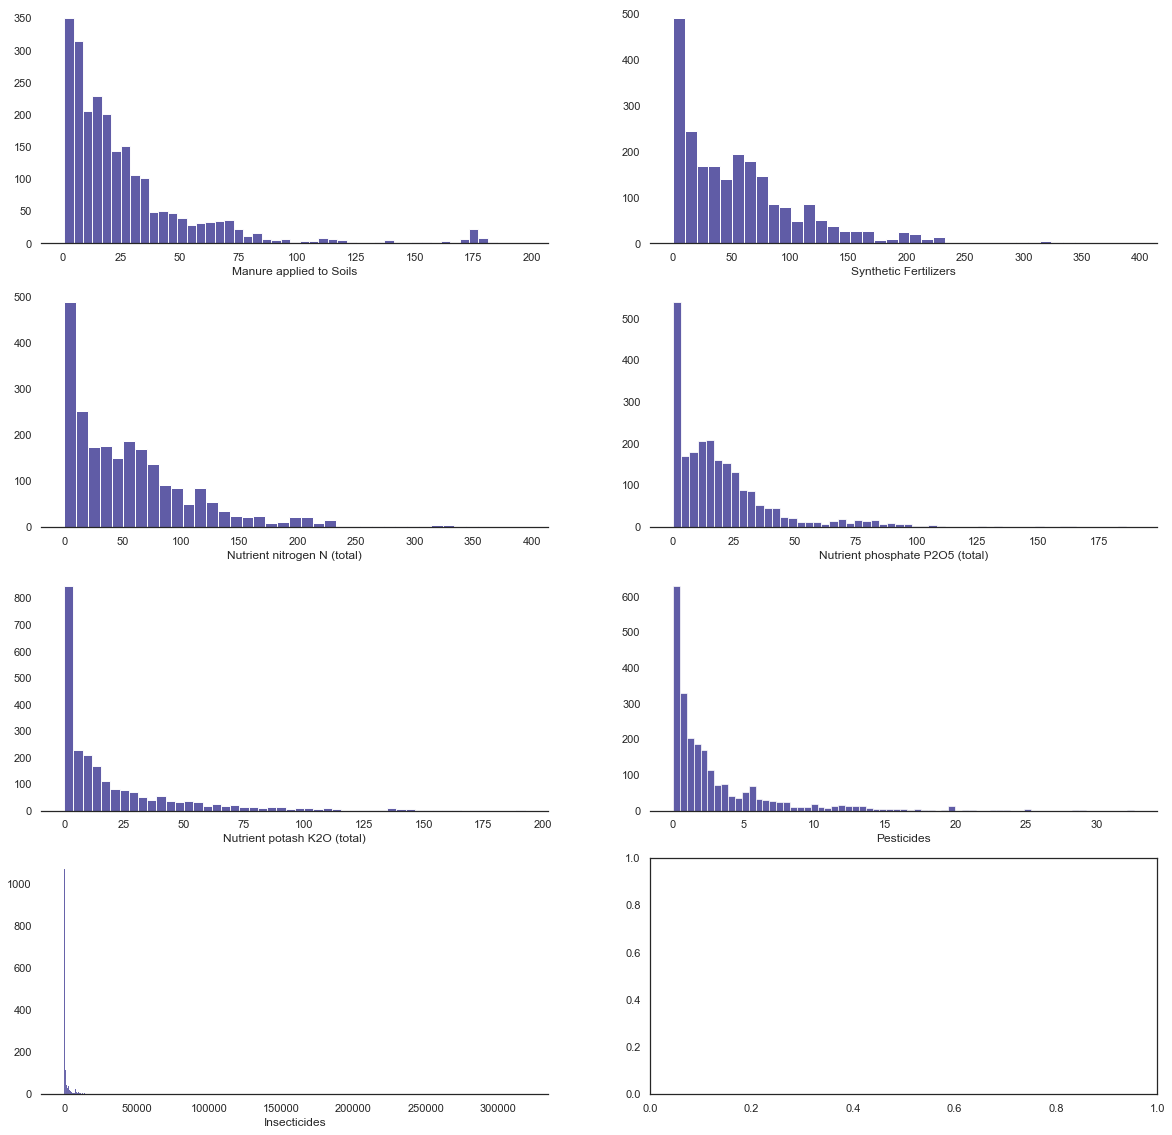

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

inputData = inputData.loc[(inputData['Manure applied to Soils']>0) &
             (inputData['Synthetic Fertilizers']>0) &
             (inputData['Nutrient nitrogen N (total)']>0) &
             (inputData['Nutrient phosphate P2O5 (total)']>0) &
             (inputData['Nutrient potash K2O (total)']>0) &
             (inputData['Pesticides']>0) &
             (inputData['Insecticides']>0)]

color = sns.color_palette("CMRmap")
sns.set(rc={'figure.figsize':(20,20)},palette = color, style = 'white')
for i, column in enumerate(totalCols[1:], 1):
    try:
        plt.subplot(4,2,i)
        
        sns.histplot(inputData[column]).set(ylabel = None)
        sns.despine(left=True)
    except:
        pass

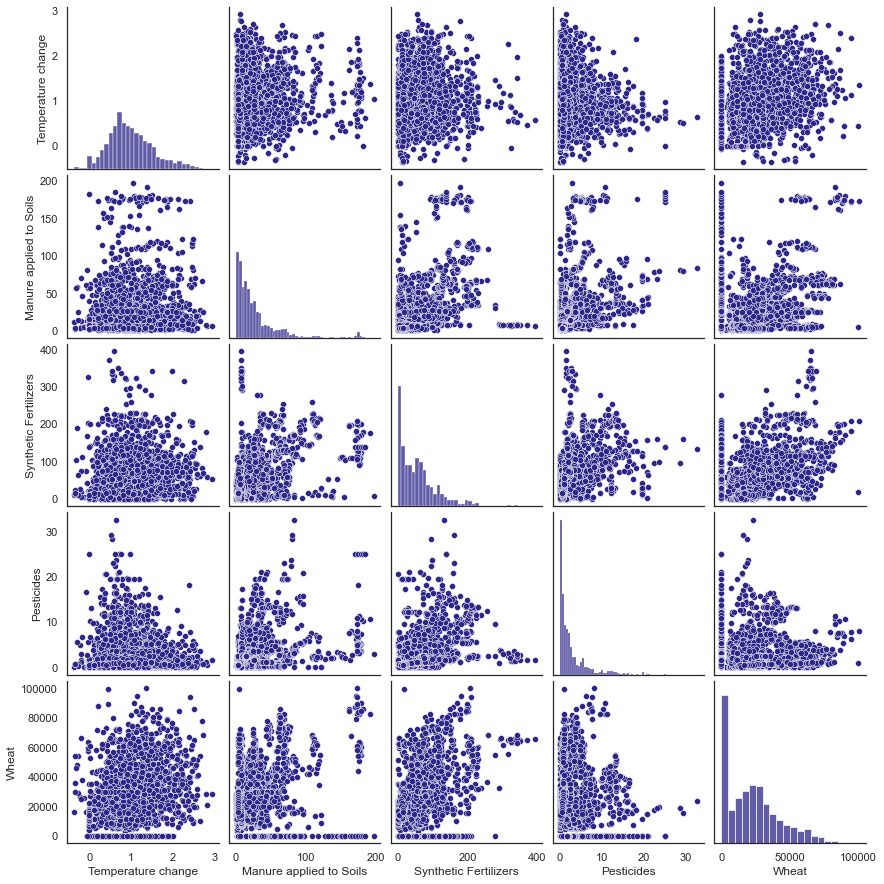

In [223]:
sns.pairplot(inputData[['Temperature change', 'Manure applied to Soils',
       'Synthetic Fertilizers','Pesticides', 'Wheat']])
plt.show()
# 'Area', 'Temperature change', 'Manure applied to Soils',
#        'Synthetic Fertilizers', 'Nutrient nitrogen N (total)',
#        'Nutrient phosphate P2O5 (total)', 'Nutrient potash K2O (total)',
#        'Pesticides', 'Insecticides', 'Crops', 'Maize', 'Apples', 'Wheat'
# inputData.columns

# Linear regression model

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

model = LinearRegression()

inputData['Area'] = LabelEncoder().fit_transform(inputData['Area'])
inputData['Maize'] = df_final['Maize']
inputData['Apples'] = df_final['Apples']
inputData['Wheat'] = df_final['Wheat']
# outputCrop = df_final['Maize']

In [84]:
# inputData = inputData.drop(['Crops'], axis=1)
# inputData.head(30)

In [224]:
totalCols = ['Temperature change','Manure applied to Soils','Synthetic Fertilizers',
             'Nutrient nitrogen N (total)','Nutrient phosphate P2O5 (total)','Nutrient potash K2O (total)',
             'Pesticides','Insecticides','Crops']
inputData[totalCols+['Wheat']].corr()['Wheat'].sort_values(ascending = False).reset_index().head(20)
# list(inputData.columns)

,index,Wheat
0,Wheat,1.000000
1,Nutrient nitrogen N (total),0.474845
2,Synthetic Fertilizers,0.457825
3,Temperature change,0.295931
4,Manure applied to Soils,0.295902
5,Nutrient phosphate P2O5 (total),0.265071
6,Nutrient potash K2O (total),0.207020
7,Insecticides,0.123534
8,Crops,0.011699
9,Pesticides,0.004893


In [130]:
inputData.describe()

,Area,Temperature change,Manure applied to Soils,Synthetic Fertilizers,Nutrient nitrogen N (total),Nutrient phosphate P2O5 (total),Nutrient potash K2O (total),Pesticides,Insecticides,Crops,Maize,Apples,Wheat
count,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000
mean,67.446598,0.995944,28.223640,58.805358,57.935947,21.021718,20.911477,2.948454,5423.695521,92.717808,40848.819552,90712.348407,22841.046942
std,38.947782,0.543228,32.333187,57.693219,57.179742,24.841567,29.227091,4.040930,27469.420585,20.460634,38940.250353,119482.816744,20409.025848
min,0.000000,-0.356000,0.901700,0.005900,0.010000,0.010000,0.010000,0.010000,1.000000,30.950000,0.000000,0.000000,0.000000
25%,34.000000,0.629000,7.720350,13.688475,13.805000,3.985000,1.832500,0.402500,73.000000,81.800000,15128.250000,0.000000,0.000000
50%,67.000000,0.921500,18.044850,46.611750,44.680000,14.430000,9.085000,1.460000,361.000000,94.605000,30170.000000,50136.500000,20615.500000
75%,101.000000,1.312000,34.632550,81.412925,81.127500,26.700000,27.650000,3.655000,2084.000000,102.710000,59601.000000,139975.750000,33928.000000
max,134.000000,2.928000,197.088900,394.738400,394.740000,189.360000,192.550000,32.630000,319002.000000,217.450000,409288.000000,783883.000000,100152.000000


In [96]:
# df_final[totalCols+['Maize']].corr()['Maize'].sort_values(ascending = False).reset_index().head(20


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = inputData.drop(['Apples','Wheat','Maize','Insecticides'], axis=1)
y = inputData['Maize']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
scaler = MinMaxScaler()

train_stats = X_train.describe().T

def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

normed_X_train = norm(X_train)
normed_X_test = norm(X_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [210]:
# model.fit(normed_X_train, y_train)
# model.fit(X_train, y_train)
model.fit(X_train_scaled, y_train)

LinearRegression()

In [226]:
from sklearn.metrics import mean_squared_error

# predictions = model.predict(normed_X_test)
predictions = model.predict(X_test_scaled)
# predictions = model.predict(X_test)
# score = model.score(normed_X_test, y_test)
score = model.score(X_test_scaled, y_test)
# score = model.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The accuracy score is: 0.56592890785539484')
# print('The rmse is: ', rmse)

The accuracy score is: 0.56592890785539484


In [227]:
print("Model Coefficients: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model Coefficients:  [ -5827.6875524   10199.45094901  -1343.28502253  17867.65720796
  65679.97918656 -48285.90831158  48620.99611331  25385.21005034
  -1925.46719429]
Model intercept:  23508.16041916789


In [213]:
coefficients = model.coef_
intercept = model.intercept_
def total_yield(params):
    val = 0
    i=0
    for param in params:
        val = val + param * coefficients[i]
        i+=1
    return val + intercept

# Predicting crop yield

In [216]:
# Params: Area, Temperature_change, Manure_applied_to_Soils,
#        Synthetic_Fertilizers, Nutrient_nitrogen,
#        Nutrient_phosphate, Nutrient_potash,
#        Pesticides, Insecticides, Pesticides_total

params=[40,1.674,39.80,47.9604,39.96,35.08,0.02,1.05,338.0]
print(total_yield(params))

918473.0656012746


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = inputData.drop(['Apples','Wheat','Maize'], axis=1)
y = inputData['Maize']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

,Area,Temperature change,Manure applied to Soils,Synthetic Fertilizers,Nutrient nitrogen N (total),Nutrient phosphate P2O5 (total),Nutrient potash K2O (total),Pesticides,Insecticides,Crops,Maize,Apples,Wheat
19,0,1.112,58.3570,17.3104,17.31,7.01,2.43,0.44,170.0,51.81,38811.0,52174.0,30455.0
20,0,1.555,57.3065,15.3076,15.31,9.30,2.15,0.46,175.0,53.17,38135.0,72683.0,28220.0
23,0,0.462,56.4281,51.6734,51.67,31.94,0.16,0.51,189.0,58.40,46197.0,50000.0,31130.0
24,0,0.255,59.6150,56.4653,56.47,35.11,0.17,0.55,194.0,58.30,45442.0,53333.0,31582.0
25,0,0.426,54.4545,43.0268,43.03,27.85,0.20,0.53,199.0,61.90,50111.0,50120.0,30787.0


In [228]:
coefficients = model.coef_
intercept = model.intercept_
def total_yield(params):
    val = 0
    i=0
    for param in params:
        val = val + param * coefficients[i]
        i+=1
    return val + intercept

params=[40,1.674,39.80,47.9604,39.96,35.08,0.02,1.05,338.0]
print(total_yield(params))

918473.0656012746
